In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
from mplsoccer.pitch import Pitch 
import seaborn as sns 

In [7]:
# Read in the data
df = pd.read_csv('data/messibetis.csv')
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38


In [8]:
# Convert the distances to match the statsbomb Pitch
df['x'] = df['x'] * 1.2
df['y'] = df['y'] * 0.8
df['endX'] = df['endX'] * 1.2
df['endY'] = df['endY'] * 0.8
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4


In [9]:
def halfSpacePitch():
    # Draw the pitch
    fig, ax = plt.subplots(figsize=(13,8))
    fig.set_facecolor('#657c8f')
    ax.set_facecolor('#657c8f')

    pitch = Pitch(pitch_type='statsbomb',orientation='horizontal', 
                pitch_color='white', line_color='black', 
                positional=True, shade_middle=False, positional_color='#657c8f', shade_color='#f2f2f2',
                constrained_layout=True, tight_layout=False,
                axis=False, label=False, figsize=(13,8))

    pitch.draw(ax=ax)
    plt.gca().invert_yaxis() 

    # Illuminate half-spaces
    rect1 = plt.Rectangle((18.3, 18.5), 83, 11.5, color="#8298ab", alpha=0.2)
    ax.add_patch(rect1)
    rect2 = plt.Rectangle((18.3, 50.3), 83, 11.5, color="#8298ab", alpha=0.2)
    ax.add_patch(rect2) 
    return fig, ax

Text(0.5, 1.0, 'Messi Heatmap vs Real Betis')

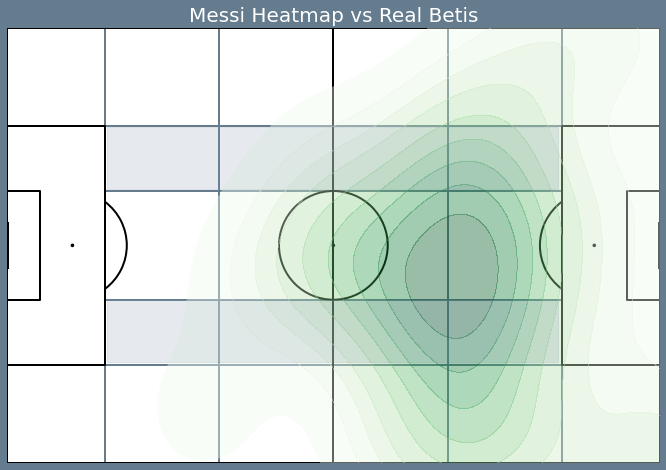

In [10]:
fig, ax = halfSpacePitch()

# Create the heatmap
kde = sns.kdeplot(
    x=df['x'], y=df['y'],
    shade=True,
    shade_lowest=False, 
    alpha=0.4,
    n_levels=10,
    cmap='Greens',
    )

plt.xlim(0,120)
plt.ylim(0,80)

plt.title('Messi Heatmap vs Real Betis', color='white', size=20)